In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft

# Question-1

In [2]:
def a0(x,l,u):
    T = 2*(u - l)
    y = (np.pi-x)/T
    return y

def a0_integration(l,u):
    I = quad(a0,l,u,args=(l,u))
    return I[0]

In [3]:
def an(x,n,l,u):
    T = 2*(u - l)
    y = 2*(np.pi-x)*np.cos(2*np.pi*n*x/T)/T
    return y

def an_integration(n,l,u):
    I = quad(an,l,u,args=(n,l,u))
    return I[0]

In [4]:
def bn(x,n,l,u):
    T = 2*(u-l)
    y = 2*(np.pi-x)*np.sin(2*np.pi*n*x/(2*T))/T
    return y

def bn_integration(n,l,u):
    I = quad(bn,l,u,args=(n,l,u))
    return I[0]

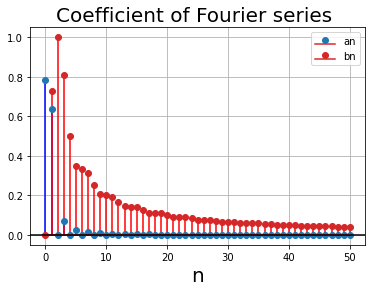

In [56]:
n = np.arange(0,51,1)
l = 0
u = np.pi
a = []
for i in n:
    if i == 0:
        a.append(a0_integration(l,u))
    else:
        a.append(an_integration(i,l,u))
an_abs = np.absolute(a)
plt.stem(n,an_abs,linefmt='blue', markerfmt='C0o',label='an')

b = []
for i in n:
    b.append(bn_integration(i,l,u))
b = np.absolute(b)
plt.stem(n,b,linefmt='red', markerfmt='C3o',label='bn')
plt.xlabel('n',fontsize=20)
plt.title('Coefficient of Fourier series ',fontsize=20)
plt.axhline(color = "Black");
plt.grid()
plt.legend()

# Question-2

## 2.(a)

In [6]:
def sawtooth_a0(x,u,l):
    T = u - l
    if x>=-1 and x<0:
        y = ((2*x)+1)/T
    elif x>=0 and x<=1:
        y = ((-2*x)+1)/T
    else:
        y = 0
    return y

def integration_a0(l,u):
    I = quad(sawtooth_a0,l,u,args=(l,u))
    return I[0]

In [7]:
def sawtooth_an(x,n,l,u):
    T = u - l
    if x>=-1 and x<0:
        f = 2*((2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        f = 2*((-2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    else:
        f = 0
    return f

def integration_an(n,l,u):
    I = quad(sawtooth_an,l,u,args=(n,l,u))
    return I[0]

In [8]:
def sawtooth_bn(x,n,l,u):
    T = l - u
    if x>=-1 and x<0:
        f = 2*((2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        f = 2*((-2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    else:
        f = 0
    return f

def integration_bn(n,l,u):
    I = quad(sawtooth_bn,l,u,args=(n,l,u))
    return I[0]

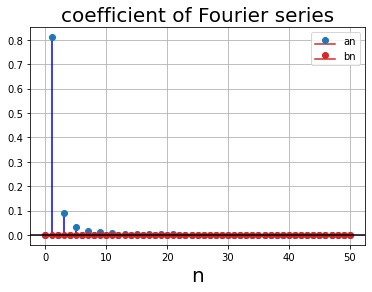

In [57]:
n = np.arange(0,51,1)
l = -1
u = 1
a = []
for i in n:
    if i == 0:
        a.append(integration_a0(l,u))
    else:
        a.append(integration_an(i,l,u))
an_abs = np.absolute(a)
plt.stem(n,an_abs,linefmt='blue', markerfmt='C0o',label='an')

b = []
for i in n:
    b.append(integration_bn(i,l,u))
b = np.absolute(b)
plt.stem(n,b,linefmt='red', markerfmt='C3o',label='bn')
plt.xlabel('n',fontsize=20)
plt.title('coefficient of Fourier series',fontsize=20)
plt.axhline(color = "Black");
plt.grid()
plt.legend()

## 2.(b)

In [10]:
def sawtooth(x):
    f = []
    for i in x:
        if i>=-1 and i<0:
            f.append((2*i)+1)
        elif i>=0 and i<=1:
            f.append((-2*i)+1)
        else:
            f.append(0)
    return f

In [11]:
def sine_1(x,n,l,u):
    T = u - l
    f = np.sin(2*np.pi*n*x/T)
    return f

In [12]:
def cosine_1(x,n,l,u):
    T = u - l
    f = np.cos(2*np.pi*n*x/T)
    return f

In [13]:
def fourier_series(x,n,l,u):
    fs = 0
    for i in range(0,n+1):
        if i==0:
            fs+=a[i]/2
        else:
            fs+=((a[i]*cosine_1(x,i,l,u))+(b[i]*sine_1(x,i,l,u)))
    return fs

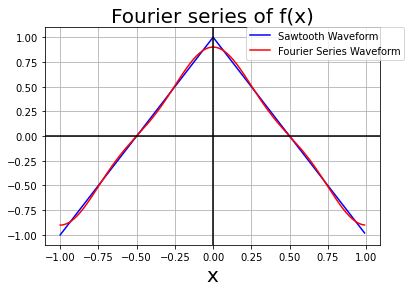

In [59]:

n = 3
l = -1
u = 1
x = np.arange(l,u,0.01)
output = sawtooth(x)
out = fourier_series(x,n,l,u)
plt.plot(x,output,'b',label='Sawtooth Waveform')
plt.plot(x,out,'r',label='Fourier Series Waveform')
plt.xlabel('x',fontsize=20)
plt.title('Fourier series of f(x)',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend(loc=(0.6,0.85))

## 2.(c)

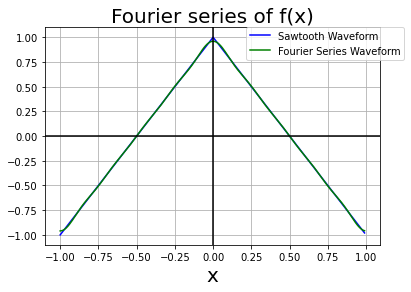

In [60]:
n = 9
l = -1
u = 1
x = np.arange(l,u,0.01)
output = sawtooth(x)
out = fourier_series(x,n,l,u)
plt.plot(x,output,'b', label='Sawtooth Waveform')
plt.plot(x,out,'g', label='Fourier Series Waveform')
plt.xlabel('x',fontsize=20)
plt.title('Fourier series of f(x)',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend(loc=(0.6,0.85))

### Observation:-
                    When we add more harmonics then we get actual shape of waveform

# Question-3

## 3.(a)

In [16]:
def x1(t):
    f = []
    for i in t:
        if i>=0:
            f.append(A*np.exp(-a*i))
        else:
            f.append(0)
    return f

In [17]:
def x1_real(t,A,a,omegha):
    if (t>0):
        return A*np.exp(-a*t)*np.cos(omegha*t)
    else:
        return 0

In [18]:
def x1_real_integration(A,a,omegha,l,u):
    I = quad(x1_real,l,u,args=(A,a,omegha))
    return I[0]

In [19]:
def x1_imag(t,A,a,omegha):
    if (t>0):
        return A*np.exp(-a*t)*np.sin(omegha*t)
    else:
        return 0

In [20]:
def x1_imag_integration(A,a,omegha,l,u):
    I = quad(x1_imag,l,u,args=(A,a,omegha))
    return I[0]

In [21]:
A = 2
a = 4
l = 0
u = np.inf
omegha = np.arange(-40,40,0.01)
x1_Real = []
x1_Imag = []
for i in omegha:
    x1_Real.append(x1_real_integration(A,a,i,l,u))
    x1_Imag.append(x1_imag_integration(A,a,i,l,u))

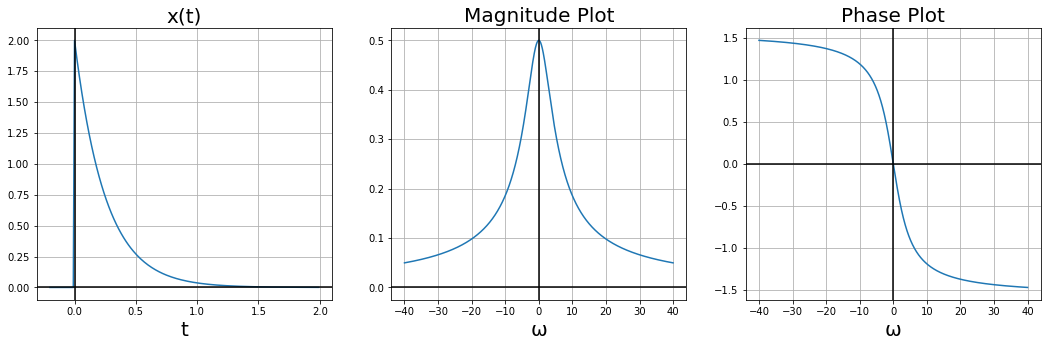

In [22]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

t = np.arange(-0.2,2,0.01)
X1 = x1(t)
axes[0].plot(t,X1)
axes[0].set_xlabel('t',fontsize=20)
axes[0].set_title('x(t)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()


x1_mag = np.absolute((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[1].plot(omegha,x1_mag)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()


x1_phase = np.angle((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[2].plot(omegha,x1_phase)
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].grid()

## 3.(b)

In [23]:
def x2(t):
    f = []
    for i in t:
        f.append(A*np.exp(-a*abs(i)))
    return f

In [24]:
def x2_real(t,A,a,omegha):
    f = A*np.exp(-a*abs(t))*np.cos(omegha*t)
    return f

In [25]:
def x2_real_integration(A,a,omegha,l,u):
    I = quad(x2_real,l,u,args=(A,a,omegha))
    return I[0]

In [26]:
def x2_imag(t,A,a,omegha):
    f = A*np.exp(-a*abs(t))*np.sin(omegha*t)
    return f

In [27]:
def x2_imag_integration(A,a,omegha,l,u):
    I = quad(x2_imag,l,u,args=(A,a,omegha))
    return I[0]

In [28]:
A = 2
a = 4
l = -np.inf
u = np.inf
omegha = np.arange(-10,10,0.01)
x2_Real = []
x2_Imag = []
for i in omegha:
    x2_Real.append(x2_real_integration(A,a,i,l,u))
    x2_Imag.append(x2_imag_integration(A,a,i,l,u))

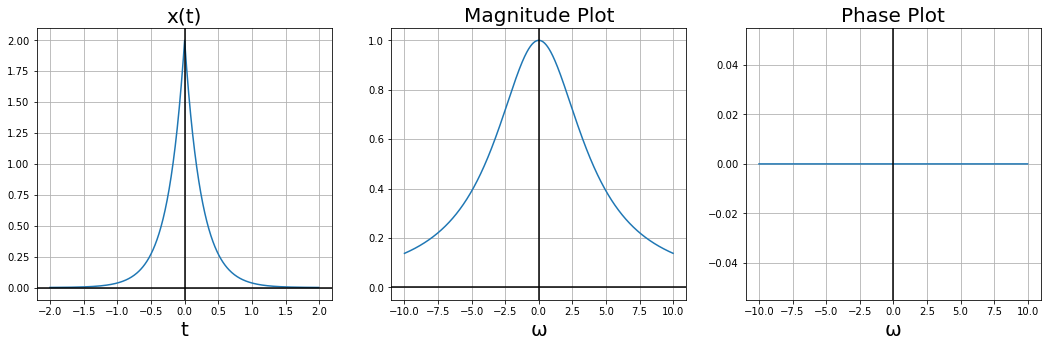

In [29]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

t = np.arange(-2,2,0.01)
X2 = x2(t)
axes[0].plot(t,X2)
axes[0].set_xlabel('t',fontsize=20)
axes[0].set_title('x(t)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()


x2_mag = np.absolute((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[1].plot(omegha,x2_mag)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()


x2_phase = np.angle((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[2].plot(omegha,x2_phase)
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot',fontsize=20)
axes[2].axvline(color = "Black")
axes[2].grid()

# Question-4

In [30]:
def func(a,omegha):
    f = 1/(1 -(a*np.exp(-1j*omegha)))
    return f

In [31]:
a = 0.8
omegha = np.arange(-10,10,0.01)
X = func(a,omegha)

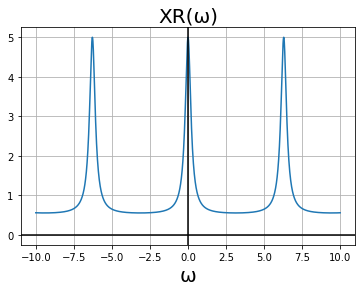

In [32]:
X_R = X.real
plt.plot(omegha,X_R)
plt.xlabel('ω',fontsize=20)
plt.title('XR(ω)',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

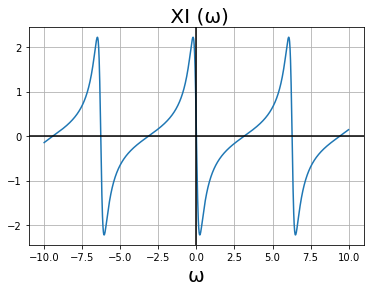

In [33]:
X_I = X.imag
plt.plot(omegha,X_I)
plt.xlabel('ω',fontsize=20)
plt.title(' XI (ω)',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

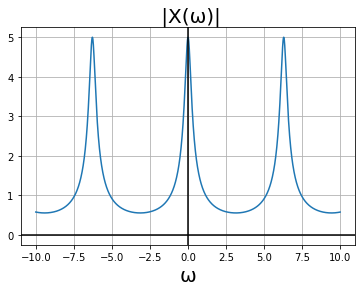

In [34]:
X_mag = np.absolute(X)
plt.plot(omegha,X_mag)
plt.xlabel('ω',fontsize=20)
plt.title(' |X(ω)|',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

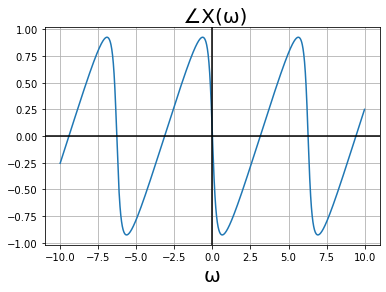

In [35]:
X_phase = np.angle(X)
plt.plot(omegha,X_phase)
plt.xlabel('ω',fontsize=20)
plt.title(' ∠X(ω)',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

# Question-5

In [36]:
def x_n(a,n):
    f = a**(abs(n))
    return f

In [37]:
def x_omegha(a,l,u,omegha):
    dtft = 0
    for i in range(l,u,1):
        dtft+=(a**(abs(i)))*(np.exp(-1j*omegha*i))
    return dtft

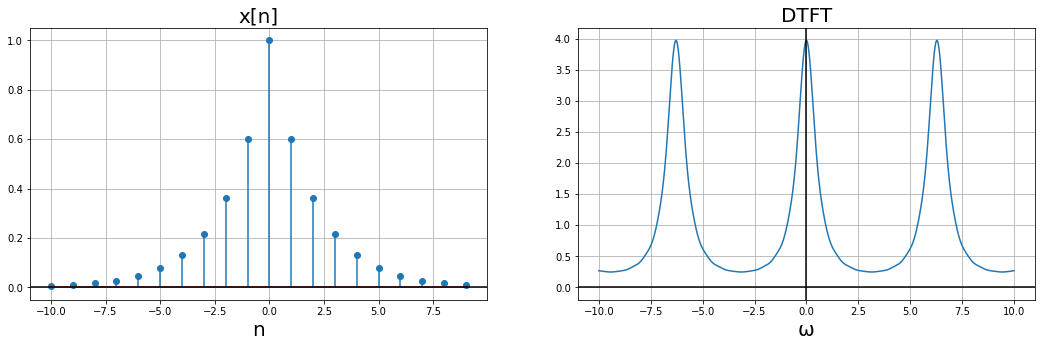

In [38]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
a = 0.6
l = -10
u = 10

n = np.arange(l,u,1)
out = x_n(a,n)
axes[0].stem(n,out)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


omegha = np.arange(l,u,0.01)
output = x_omegha(a,l,u,omegha)
output_abs = np.absolute(output)
axes[1].plot(omegha,output_abs)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('DTFT',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].axvline(color = "Black");
axes[1].grid()

# Question-6

## 6.(a)

In [39]:
def fun(a,f,t):
    f = a*np.sin(2*np.pi*f*t)
    return f

In [40]:
t = np.arange(0,1,0.01)
a1 = 3
f1 = 2
x1 = fun(a1,f1,t)

In [41]:
a2 = 2
f2 = 5
x2 = fun(a2,f2,t)

In [42]:
a3 = 1
f3 = 8
x3 = fun(a3,f3,t)

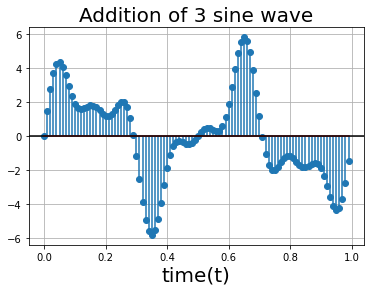

In [43]:
x = x1 + x2 + x3
plt.stem(t,x)
plt.xlabel('time(t)',fontsize=20)
plt.title('Addition of 3 sine wave',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

## 6.(b)

In [44]:
def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out

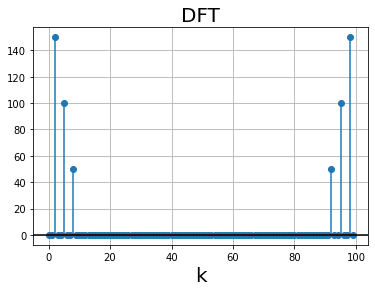

In [45]:
t = np.arange(0,100,1)
y = DFT(x)
y_abs = np.absolute(y)
plt.stem(t,y_abs)
plt.xlabel('k',fontsize=20)
plt.title('DFT',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

## 6.(c)

In [46]:
def Filter(x,fs):
    fil = [] 
    for i in range(len(x)):
        if i<fs:
            fil.append(x[i])
    return fil

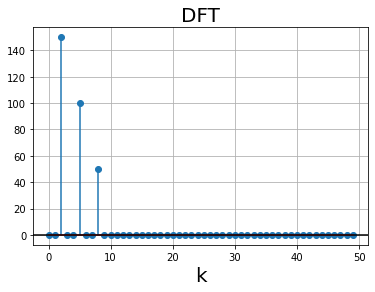

In [47]:
t1 = np.arange(0,50,1)
output = Filter(y_abs,100/2)
plt.stem(t1,output)
plt.xlabel('k',fontsize=20)
plt.title('DFT',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

# Question-7

## 7.(a)

In [48]:
def sine(a,f,n,fs):
    f = a*np.sin(2*np.pi*f*n/fs)
    return f

Text(0.5, 1.0, 'Sampled sinusoidal waveform')

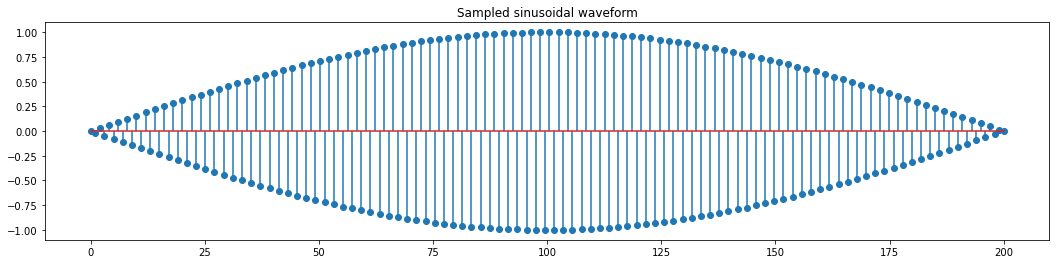

In [61]:
fig, axes = plt.subplots(figsize=(18,4))
a = 1
f = 100
fs = 200
n = np.linspace(0,fs,200)
s = sine(a,f,n,fs)
plt.stem(n,s)
plt.title('Sampled sinusoidal waveform')

## 7.(b)

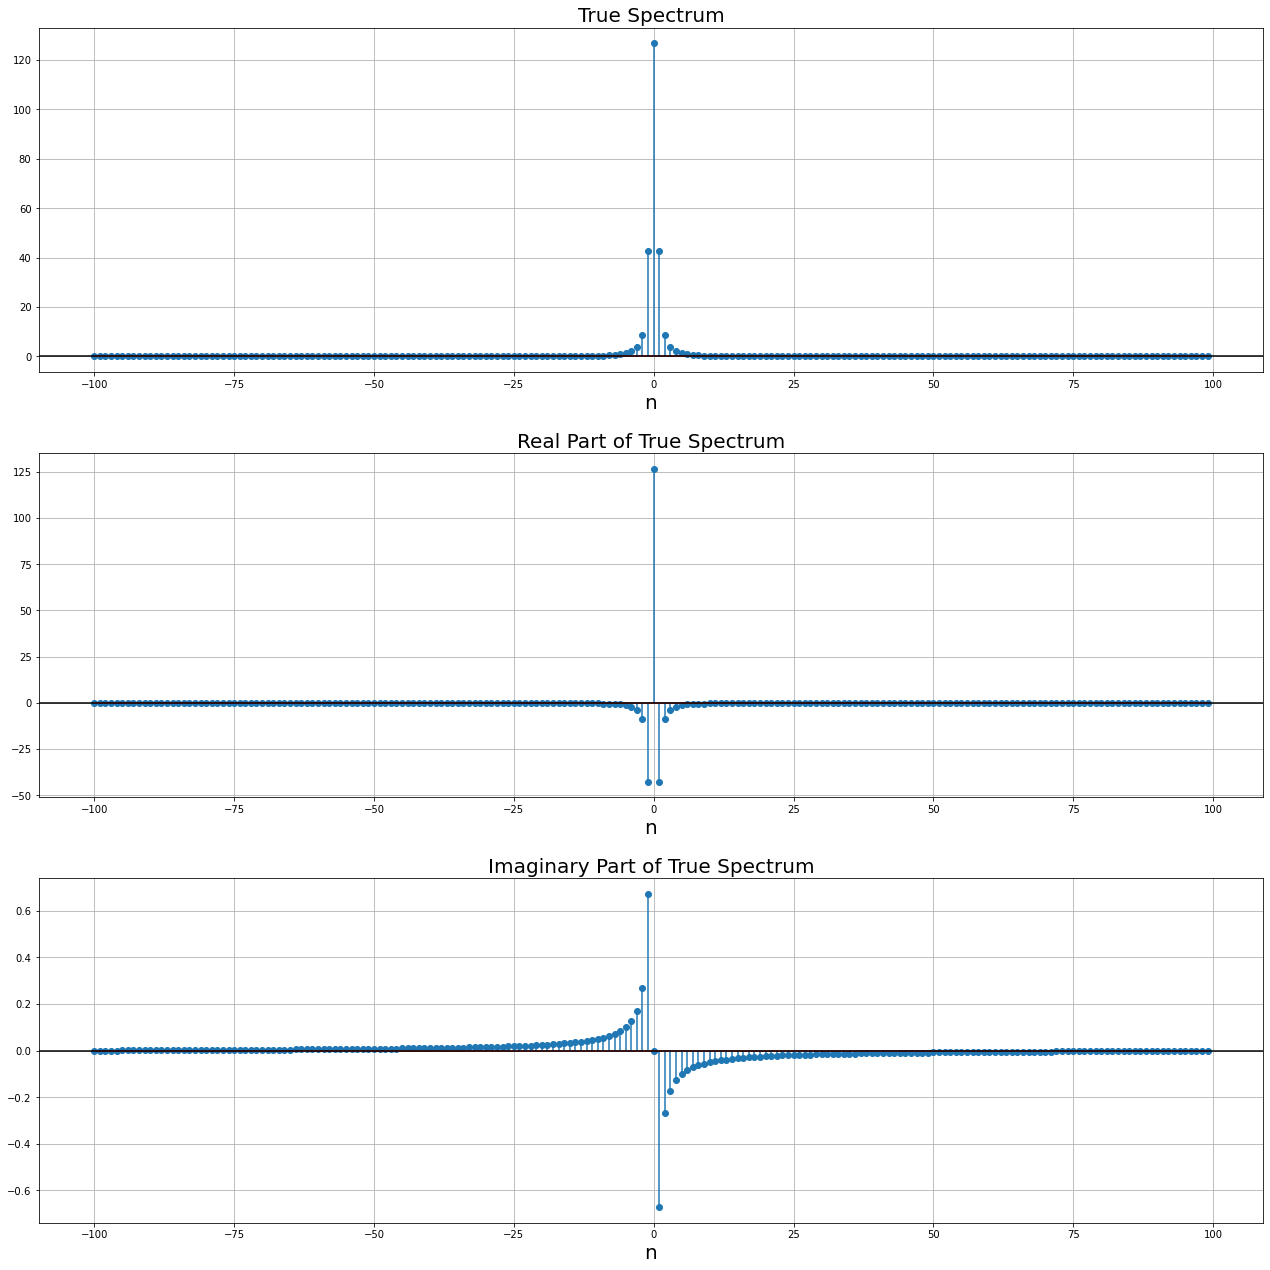

In [50]:
fig, axes = plt.subplots(3,1,figsize=(18,18))

n1 = np.arange(-100,100,1)
true_spectrum = DFT(s)
      
axes[0].stem(n1,np.abs(true_spectrum))
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('True Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()

axes[1].stem(n1,np.array(true_spectrum).real)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Real Part of True Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

axes[2].stem(n1,np.array(true_spectrum).imag)
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_title('Imaginary Part of True Spectrum',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].grid()

plt.tight_layout(pad=2)

## 7.(c)

In [51]:
def window_seq(a,n,T):
    rect =[]
    for sample in n:
        if sample < -T/2:
            rect.append(0)
        elif sample > +T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

## 7.(d)

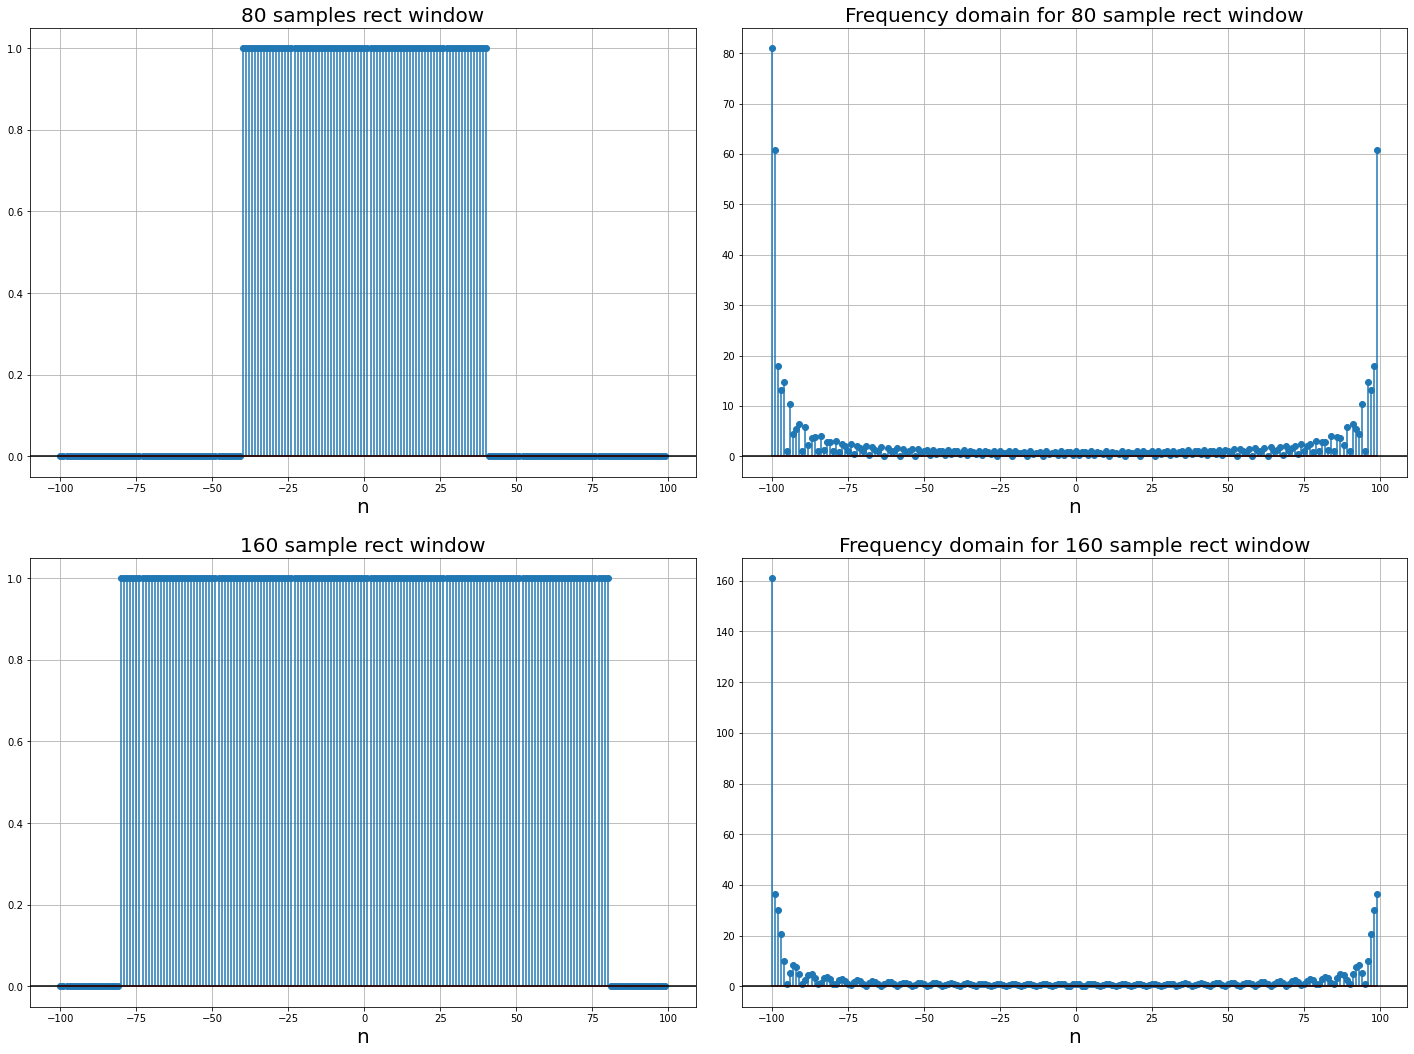

In [52]:
fig, axes =plt.subplots(2,2,figsize=(20,15)) 

a = 1
T = 80
w1 = window_seq(a,n1,T)
axes[0,0].stem(n1,w1) 
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_title('80 samples rect window',fontsize=20)
axes[0,0].axhline(color = "Black")
axes[0,0].grid()


w1_dtft = DFT(w1)
axes[0,1].stem(n1,np.absolute(w1_dtft))
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_title('Frequency domain for 80 sample rect window',fontsize=20)
axes[0,1].axhline(color = "Black")
axes[0,1].grid()


a = 1
c = 0
T = 160
w2 = window_seq(a,n1,T)
axes[1,0].stem(n1,w2)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_title('160 sample rect window',fontsize=20)
axes[1,0].axhline(color = "Black")
axes[1,0].grid()


w2_dtft = DFT(w2)
axes[1,1].stem(n1,np.abs(w2_dtft))
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_title('Frequency domain for 160 sample rect window',fontsize=20)
axes[1,1].axhline(color = "Black")
axes[1,1].grid()

plt.tight_layout(pad=2)

## 7.(e)

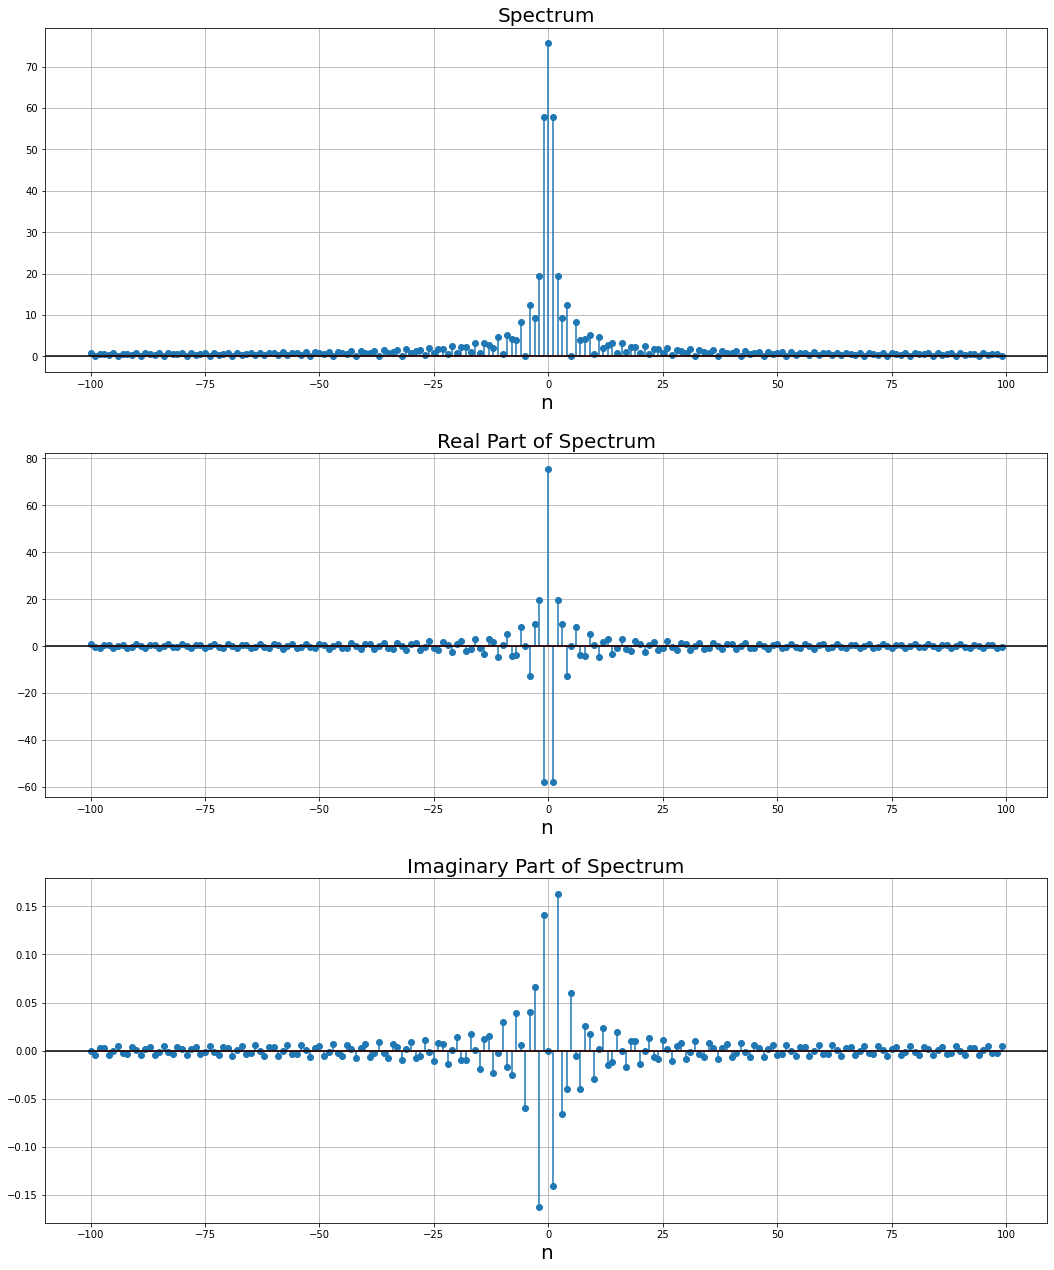

In [53]:
fig, axes = plt.subplots(3,1,figsize=(15,18))

m1 = s*w1

axes[0].stem(n1,np.abs(DFT(m1))) 
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()


axes[1].stem(n1,np.array(DFT(m1)).real) 
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Real Part of Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()


axes[2].stem(n1,np.array(DFT(m1)).imag) 
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_title('Imaginary Part of Spectrum',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].grid()

plt.tight_layout(pad=2)

## 7.(f)

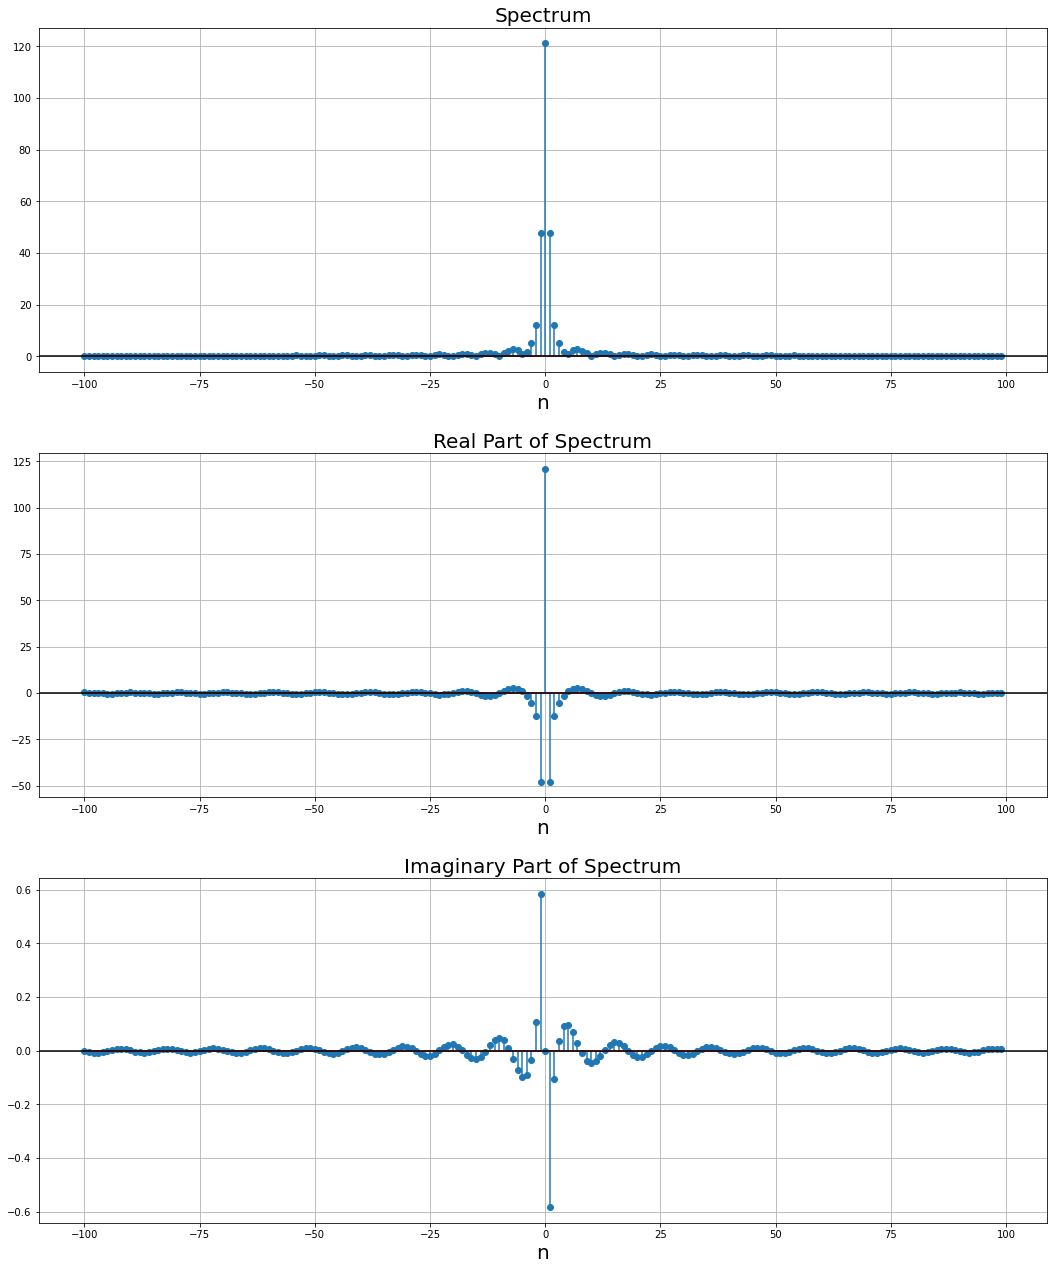

In [54]:
fig, axes = plt.subplots(3,1,figsize=(15,18))

m2 = s*w2

axes[0].stem(n1,np.abs(DFT(m2))) 
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()


axes[1].stem(n1,np.array(DFT(m2)).real) 
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Real Part of Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()


axes[2].stem(n1,np.array(DFT(m2)).imag) 
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_title('Imaginary Part of Spectrum',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].grid()


plt.tight_layout(pad=2)